In [18]:
import rasterio
import numpy as np
import os

import matplotlib.pyplot as plt

import sys
sys.path.append('../scripts')
import landcover_definitions as lc

Make sure you first run `visualize_px_and_px_given_c.ipynb` to get the npy files

In [19]:
torchgeo_data_dir_cc = '/datadrive/esther/torchgeo_data/cvpr_chesapeake_landcover'

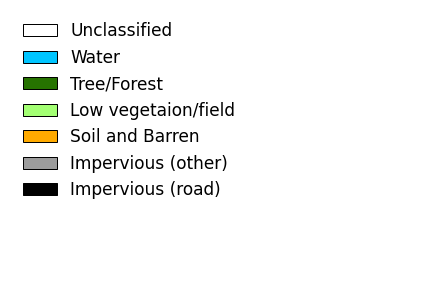

In [20]:
lc.make_legend_figure('chesapeake_7')

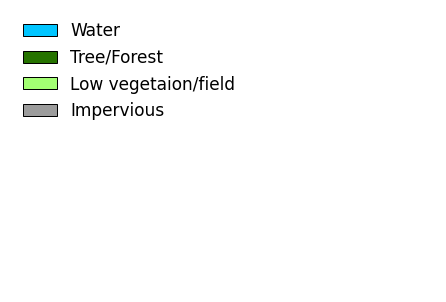

In [21]:
lc.make_legend_figure('chesapeake_4_no_zeros')

# PA from npy files

In [22]:
lc_type = 'chesapeake_4_no_zeros'

In [23]:
tile_id_pa = '3907614_ne_18_1'
img_pa = np.load(f'figure_data/img_pa_{tile_id_pa}.npy')
q_pa = np.load(f'figure_data/q_pa_{tile_id_pa}.npy')
prior_pa = np.load(f'figure_data/prior_pa_{tile_id_pa}.npy')

data_dir_pa = f'{torchgeo_data_dir_cc}/pa_1m_2013_extended-debuffered-test_tiles'
hr_labels_pa = rasterio.open(os.path.join(data_dir_pa, f'm_{tile_id_pa}_lc.tif')).read()[0]

impervious_idxs_highres_orig = [4,5,6]
impervious_idx_condesed = 4
for c_idx in impervious_idxs_highres_orig:
    hr_labels_pa[hr_labels_pa == c_idx] = impervious_idx_condesed
hr_labels_pa = hr_labels_pa - 1

In [24]:
# saved prior is already smoothed
prior_pa = prior_pa / prior_pa.sum(axis=0)

z_pa = (q_pa.T / q_pa.sum(axis=(1,2))).T
r_pa = (z_pa * prior_pa) /(z_pa * prior_pa).sum(axis=0)

Text(0.5, 1.0, 'Highres Labels')

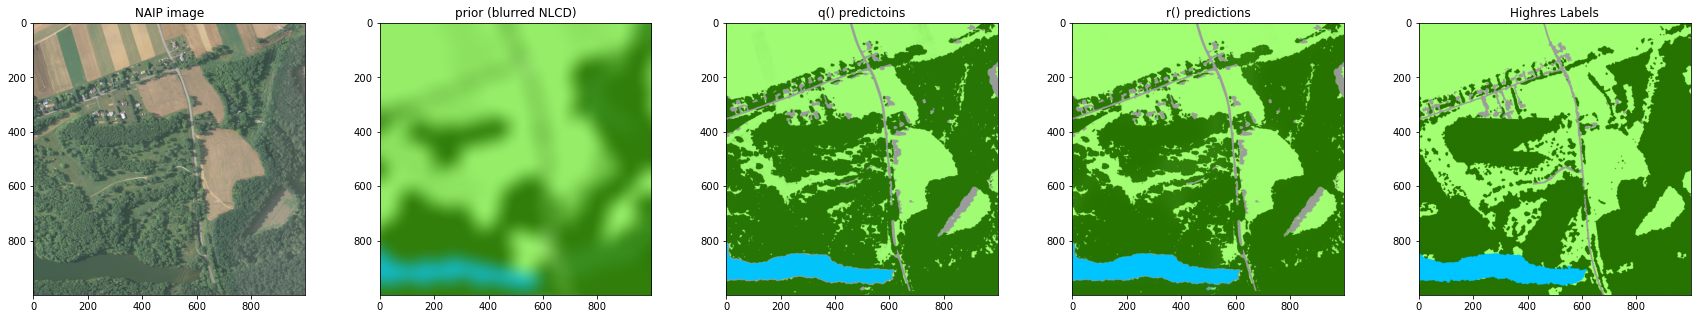

In [25]:
fig, ax = plt.subplots(1,5, figsize=(30,5))

h1, h2 = 2000, 3000
w1, w2 = 3000, 4000 

ax[0].imshow(img_pa[:3, h1:h2, w1:w2].T.swapaxes(0,1))
ax[0].set_title('NAIP image')

ax[1].imshow(lc.vis_lc(prior_pa[:, h1:h2, w1:w2],lc_type).T.swapaxes(0,1))
ax[1].set_title('prior (blurred NLCD)')

ax[2].imshow(lc.vis_lc(q_pa[:, h1:h2, w1:w2],lc_type).T.swapaxes(0,1))
ax[2].set_title('q() predictoins')

ax[3].imshow(lc.vis_lc(r_pa[:, h1:h2, w1:w2],lc_type).T.swapaxes(0,1))
ax[3].set_title('r() predictions')

ax[4].imshow(lc.vis_lc(hr_labels_pa[h1:h2, w1:w2],lc_type).T.swapaxes(0,1))
ax[4].set_title('Highres Labels')

# NY from npy files

In [26]:
tile_id_ny = '4207539_se_18_1'
prior_ny = np.load(f'figure_data/prior_ny_{tile_id_ny}.npy')
q_ny = np.load(f'figure_data/q_ny_{tile_id_ny}.npy')
img_ny = np.load(f'figure_data/img_ny_{tile_id_ny}.npy')

data_dir_ny = f'{torchgeo_data_dir_cc}/ny_1m_2013_extended-debuffered-test_tiles'
hr_labels_ny = rasterio.open(os.path.join(data_dir_ny, f'm_{tile_id_ny}_lc.tif')).read()[0]

impervious_idxs_highres_orig = [4,5,6]
impervious_idx_condensed = 4
for c_idx in impervious_idxs_highres_orig:
    hr_labels_ny[hr_labels_ny == c_idx] = impervious_idx_condensed

hr_labels_ny = hr_labels_ny - 1

In [27]:
# prior is already blurred and should already by normalized
prior_ny = prior_ny / prior_ny.sum(axis=0)
z_ny = (q_ny.T / q_ny.sum(axis=(1,2))).T
r_ny = (z_ny * prior_ny) /(z_ny * prior_ny).sum(axis=0)

Text(0.5, 1.0, 'Highres Labels')

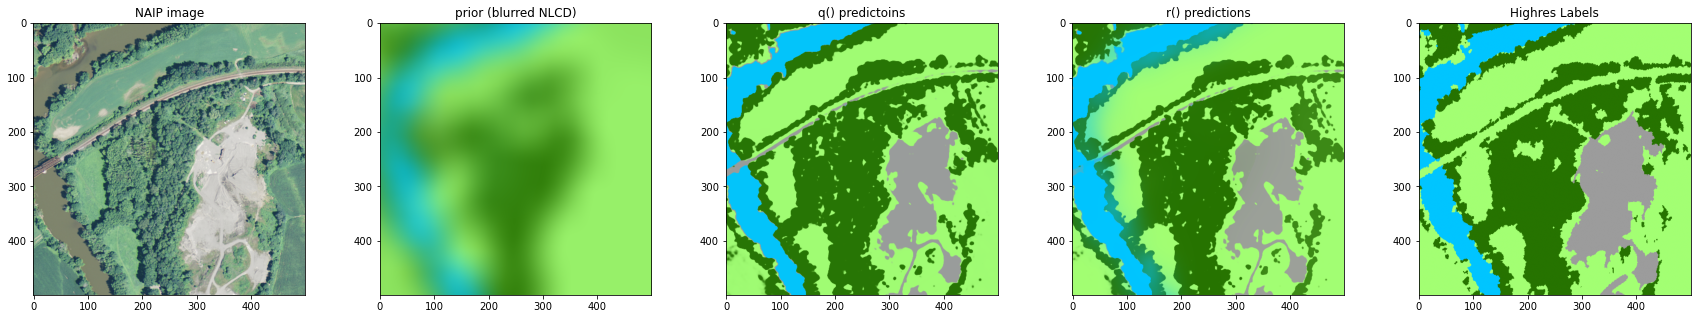

In [28]:
fig, ax = plt.subplots(1,5, figsize=(30,5))

h1, h2 = 4000,4500
w1, w2 = 1500,2000

ax[0].imshow(img_ny[:3, h1:h2, w1:w2].T.swapaxes(0,1))
ax[0].set_title('NAIP image')

ax[1].imshow(lc.vis_lc(prior_ny[:, h1:h2, w1:w2],lc_type).T.swapaxes(0,1))
ax[1].set_title('prior (blurred NLCD)')

ax[2].imshow(lc.vis_lc(q_ny[:, h1:h2, w1:w2],lc_type).T.swapaxes(0,1))
ax[2].set_title('q() predictoins')

ax[3].imshow(lc.vis_lc(r_ny[:, h1:h2, w1:w2],lc_type).T.swapaxes(0,1))
ax[3].set_title('r() predictions')

ax[4].imshow(lc.vis_lc(hr_labels_ny[h1:h2, w1:w2],lc_type).T.swapaxes(0,1))
ax[4].set_title('Highres Labels')